# Combined Multi-Dataset Analysis for Normative Modeling

This notebook combines **8 neuroimaging datasets** for normative modeling of brain aging and dementia.

**Total Sample**: 3,149 healthy controls aged ≥45 years  
**Datasets**: AABC/HCA, ADNI, IXI, OASIS (1+2+3), PPMI, SRPBS  
**Geographic Coverage**: North America, Europe, Asia  
**Population Diversity**: African American, Asian, Caucasian

**Updated**: 2025-11-19 (Age criterion changed from ≥50 to ≥45)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 6)

# Color palette for datasets
dataset_colors = {
    'AABC': '#e74c3c',      # Red
    'ADNI': '#3498db',      # Blue
    'IXI': '#2ecc71',       # Green
    'OASIS1': '#f39c12',    # Orange
    'OASIS2': '#e67e22',    # Dark Orange
    'OASIS3': '#d35400',    # Burnt Orange
    'PPMI': '#9b59b6',      # Purple
    'SRPBS': '#1abc9c'      # Turquoise
}
import os 
os.chdir(Path().absolute().parent)

## 1. Load All Datasets

In [2]:
print("="*80)
print("LOADING ALL DATASETS (Age ≥45)")
print("="*80)
print()

datasets = {}

# 1. AABC/HCA
try:
    aabc = pd.read_csv('data/AABC/aabc_healthy_controls_age45plus.csv')
    datasets['AABC'] = aabc
    print(f"✓ AABC/HCA: {len(aabc):,} subjects (age {aabc['age'].min():.0f}-{aabc['age'].max():.0f})")
except FileNotFoundError:
    print("✗ AABC/HCA: File not found")

# 2. ADNI
try:
    adni = pd.read_csv('data/ADNI/adni_healthy_controls_age45plus.csv')
    datasets['ADNI'] = adni
    print(f"✓ ADNI: {len(adni):,} subjects (age {adni['age'].min():.0f}-{adni['age'].max():.0f})")
except FileNotFoundError:
    print("✗ ADNI: File not found")

# 3. IXI
try:
    ixi = pd.read_csv('data/IXI/ixi_healthy_controls_age45plus.csv')
    datasets['IXI'] = ixi
    print(f"✓ IXI: {len(ixi):,} subjects (age {ixi['age'].min():.0f}-{ixi['age'].max():.0f})")
except FileNotFoundError:
    print("✗ IXI: File not found")

# 4. OASIS-1
try:
    oasis1 = pd.read_csv('data/OASIS/OASIS1/oasis1_healthy_controls_age45plus.csv')
    datasets['OASIS1'] = oasis1
    print(f"✓ OASIS-1: {len(oasis1):,} subjects (age {oasis1['age'].min():.0f}-{oasis1['age'].max():.0f})")
except FileNotFoundError:
    print("✗ OASIS-1: File not found")

# 5. OASIS-2
try:
    oasis2 = pd.read_csv('data/OASIS/OASIS2/oasis2_healthy_controls_age60plus.csv')
    datasets['OASIS2'] = oasis2
    print(f"✓ OASIS-2: {len(oasis2):,} subjects (age {oasis2['age'].min():.0f}-{oasis2['age'].max():.0f})")
except FileNotFoundError:
    print("✗ OASIS-2: File not found")

# 6. OASIS-3
try:
    oasis3 = pd.read_csv('data/OASIS/OASIS 3/oasis3_healthy_controls_age45plus.csv')
    datasets['OASIS3'] = oasis3
    print(f"✓ OASIS-3: {len(oasis3):,} subjects (age {oasis3['age'].min():.0f}-{oasis3['age'].max():.0f})")
except FileNotFoundError:
    print("✗ OASIS-3: File not found")

# 7. PPMI
try:
    ppmi = pd.read_csv('data/PPMI/ppmi_healthy_controls_age45plus.csv')
    datasets['PPMI'] = ppmi
    print(f"✓ PPMI: {len(ppmi):,} subjects (age {ppmi['age'].min():.0f}-{ppmi['age'].max():.0f})")
except FileNotFoundError:
    print("✗ PPMI: File not found")

# 8. SRPBS
try:
    srpbs = pd.read_csv('data/SRPBS/srpbs_healthy_controls_age45plus.csv')
    datasets['SRPBS'] = srpbs
    print(f"✓ SRPBS: {len(srpbs):,} subjects (age {srpbs['age'].min():.0f}-{srpbs['age'].max():.0f})")
except FileNotFoundError:
    print("✗ SRPBS: File not found")

print()
print(f"Total datasets loaded: {len(datasets)}/8")
total_subjects = sum(len(df) for df in datasets.values())
print(f"Total subjects: {total_subjects:,}")

LOADING ALL DATASETS (Age ≥45)

✓ AABC/HCA: 670 subjects (age 45-89)
✓ ADNI: 541 subjects (age 55-90)
✓ IXI: 340 subjects (age 45-86)
✓ OASIS-1: 132 subjects (age 45-94)
✓ OASIS-2: 85 subjects (age 60-93)
✓ OASIS-3: 960 subjects (age 45-95)
✓ PPMI: 170 subjects (age 45-85)
✓ SRPBS: 251 subjects (age 45-80)

Total datasets loaded: 8/8
Total subjects: 3,149


## 2. Harmonize Column Names and Combine

In [3]:
# Standardize columns across all datasets
combined_dfs = []

for dataset_name, df in datasets.items():
    # Create standardized dataframe
    std_df = pd.DataFrame({
        'subject_id': df['subject_id'],
        'age': df['age'],
        'sex': df['sex'],
        'dataset': dataset_name
    })
    
    # Add site if available
    if 'site' in df.columns:
        std_df['site'] = df['site']
    else:
        std_df['site'] = dataset_name  # Use dataset name as site for single-site datasets
    
    # Add cognitive score if available
    if 'mmse' in df.columns:
        std_df['cognitive_score'] = df['mmse']
        std_df['cognitive_test'] = 'MMSE'
    elif 'moca_score' in df.columns:
        std_df['cognitive_score'] = df['moca_score']
        std_df['cognitive_test'] = 'MoCA'
    else:
        std_df['cognitive_score'] = np.nan
        std_df['cognitive_test'] = 'None'
    
    combined_dfs.append(std_df)

# Combine all datasets
combined = pd.concat(combined_dfs, ignore_index=True)

print("="*80)
print("COMBINED DATASET")
print("="*80)
print(f"Total subjects: {len(combined):,}")
print(f"\nAge range: {combined['age'].min():.0f}-{combined['age'].max():.0f} years")
print(f"Age mean: {combined['age'].mean():.1f} ± {combined['age'].std():.1f}")
print(f"Age median: {combined['age'].median():.0f}")
print(f"\nSex distribution:")
print(combined['sex'].value_counts())
print(f"\nDataset distribution:")
print(combined['dataset'].value_counts().sort_values(ascending=False))

COMBINED DATASET
Total subjects: 3,149

Age range: 45-95 years
Age mean: 66.2 ± 10.7
Age median: 67

Sex distribution:
sex
F    1815
M    1334
Name: count, dtype: int64

Dataset distribution:
dataset
OASIS3    960
AABC      670
ADNI      541
IXI       340
SRPBS     251
PPMI      170
OASIS1    132
OASIS2     85
Name: count, dtype: int64


## 3. Dataset Size Comparison

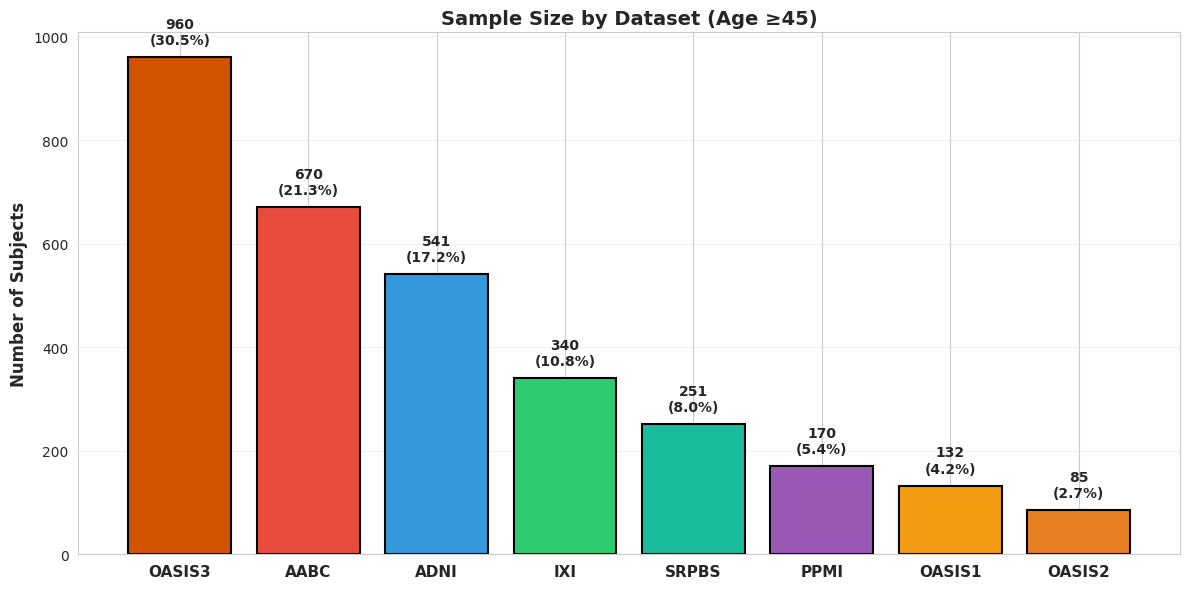


Dataset Contributions:
--------------------------------------------------
OASIS3    :  960 ( 30.5%) ███████████████
AABC      :  670 ( 21.3%) ██████████
ADNI      :  541 ( 17.2%) ████████
IXI       :  340 ( 10.8%) █████
SRPBS     :  251 (  8.0%) ███
PPMI      :  170 (  5.4%) ██
OASIS1    :  132 (  4.2%) ██
OASIS2    :   85 (  2.7%) █


In [4]:
# Dataset sizes
dataset_counts = combined['dataset'].value_counts().sort_values(ascending=False)

# Create bar plot
fig, ax = plt.subplots(figsize=(12, 6))
colors = [dataset_colors.get(ds, '#95a5a6') for ds in dataset_counts.index]
bars = ax.bar(range(len(dataset_counts)), dataset_counts.values, color=colors, edgecolor='black', linewidth=1.5)

ax.set_xticks(range(len(dataset_counts)))
ax.set_xticklabels(dataset_counts.index, fontsize=11, fontweight='bold')
ax.set_ylabel('Number of Subjects', fontsize=12, fontweight='bold')
ax.set_title('Sample Size by Dataset (Age ≥45)', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for i, (bar, count) in enumerate(zip(bars, dataset_counts.values)):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 20,
            f'{int(count):,}\n({count/len(combined)*100:.1f}%)',
            ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

print("\nDataset Contributions:")
print("-" * 50)
for dataset, count in dataset_counts.items():
    pct = count / len(combined) * 100
    bar = '█' * int(pct / 2)
    print(f"{dataset:<10s}: {count:4d} ({pct:5.1f}%) {bar}")

## 4. Age Distribution Analysis

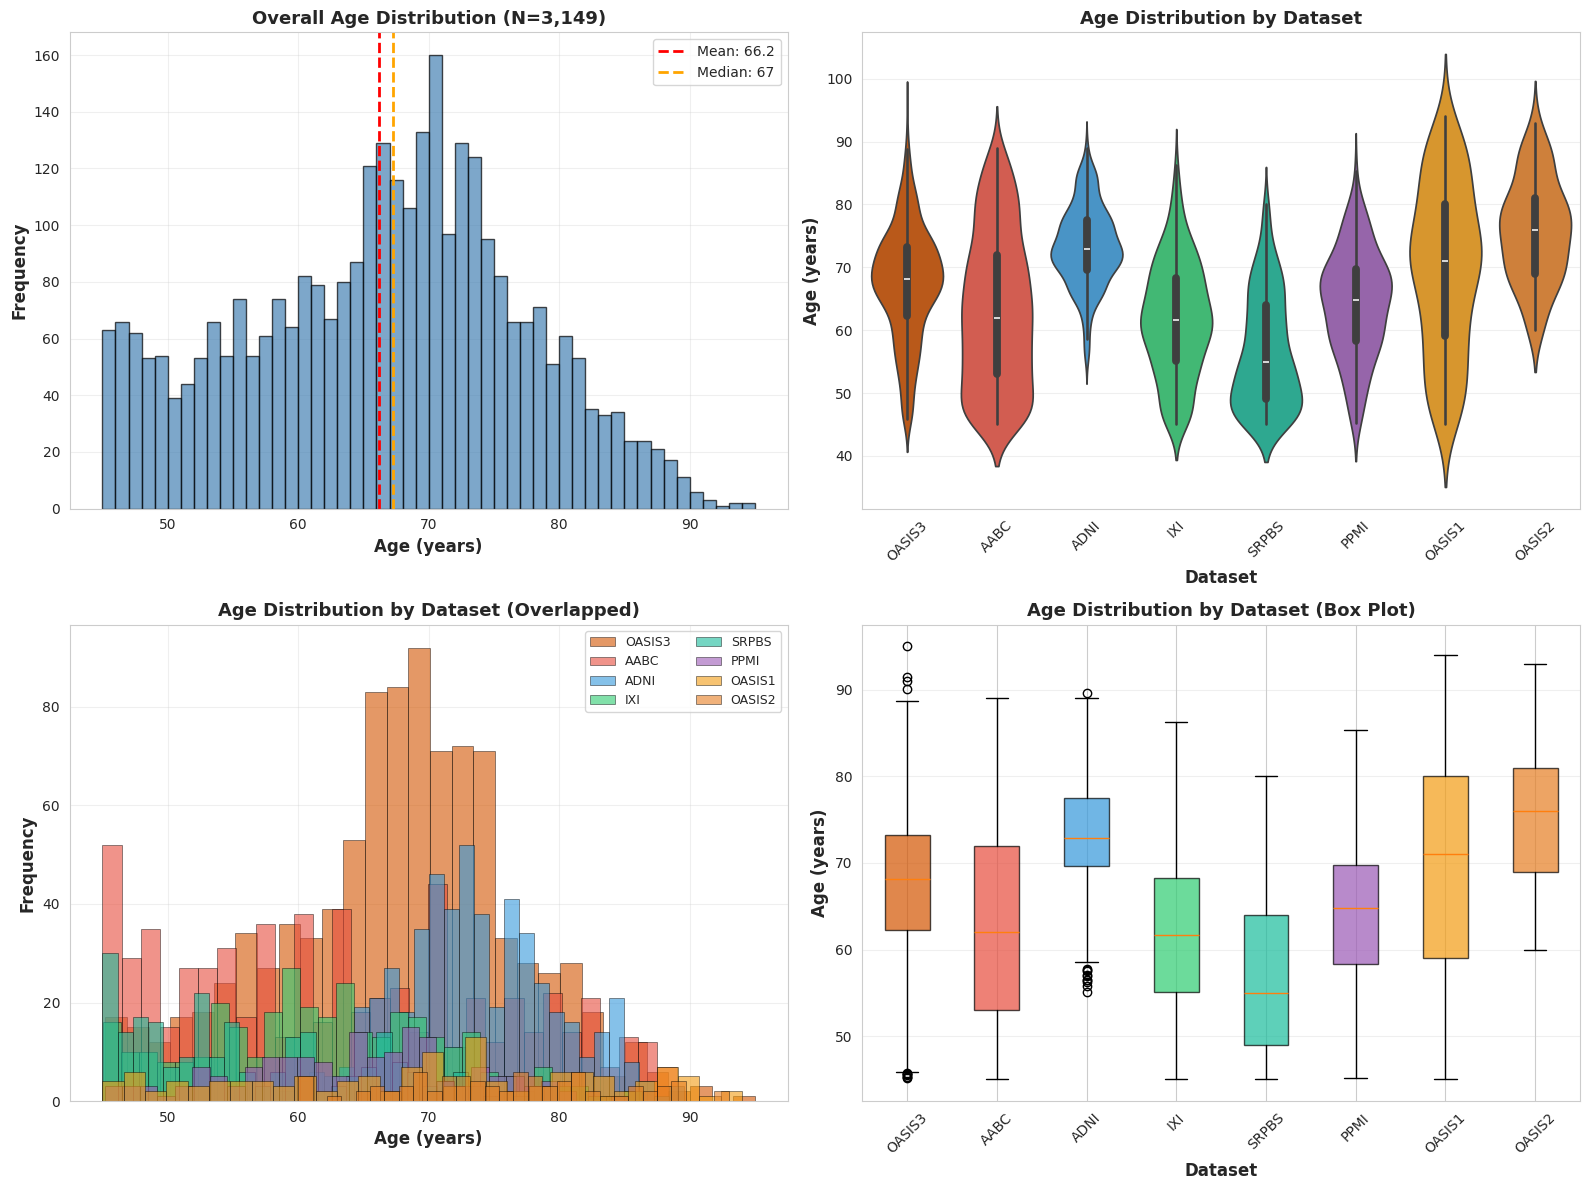

In [5]:
# Age distribution by dataset
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Overall age histogram
ax = axes[0, 0]
ax.hist(combined['age'], bins=50, edgecolor='black', alpha=0.7, color='steelblue')
ax.axvline(combined['age'].mean(), color='red', linestyle='--', linewidth=2, 
           label=f'Mean: {combined['age'].mean():.1f}')
ax.axvline(combined['age'].median(), color='orange', linestyle='--', linewidth=2,
           label=f'Median: {combined['age'].median():.0f}')
ax.set_xlabel('Age (years)', fontsize=12, fontweight='bold')
ax.set_ylabel('Frequency', fontsize=12, fontweight='bold')
ax.set_title(f'Overall Age Distribution (N={len(combined):,})', fontsize=13, fontweight='bold')
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)

# 2. Age distribution by dataset (violin plot)
ax = axes[0, 1]
dataset_order = dataset_counts.index.tolist()
sns.violinplot(data=combined, x='dataset', y='age', order=dataset_order, 
               palette=dataset_colors, ax=ax)
ax.set_xlabel('Dataset', fontsize=12, fontweight='bold')
ax.set_ylabel('Age (years)', fontsize=12, fontweight='bold')
ax.set_title('Age Distribution by Dataset', fontsize=13, fontweight='bold')
ax.tick_params(axis='x', rotation=45)
ax.grid(True, alpha=0.3, axis='y')

# 3. Stacked histogram by dataset
ax = axes[1, 0]
for dataset in dataset_order:
    data = combined[combined['dataset'] == dataset]['age']
    ax.hist(data, bins=30, alpha=0.6, label=dataset, 
            color=dataset_colors.get(dataset, '#95a5a6'), edgecolor='black', linewidth=0.5)
ax.set_xlabel('Age (years)', fontsize=12, fontweight='bold')
ax.set_ylabel('Frequency', fontsize=12, fontweight='bold')
ax.set_title('Age Distribution by Dataset (Overlapped)', fontsize=13, fontweight='bold')
ax.legend(fontsize=9, ncol=2)
ax.grid(True, alpha=0.3)

# 4. Box plot by dataset
ax = axes[1, 1]
bp = ax.boxplot([combined[combined['dataset'] == ds]['age'].values for ds in dataset_order],
                 labels=dataset_order, patch_artist=True)
for patch, dataset in zip(bp['boxes'], dataset_order):
    patch.set_facecolor(dataset_colors.get(dataset, '#95a5a6'))
    patch.set_alpha(0.7)
ax.set_xlabel('Dataset', fontsize=12, fontweight='bold')
ax.set_ylabel('Age (years)', fontsize=12, fontweight='bold')
ax.set_title('Age Distribution by Dataset (Box Plot)', fontsize=13, fontweight='bold')
ax.tick_params(axis='x', rotation=45)
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

## 5. Sex Distribution Analysis

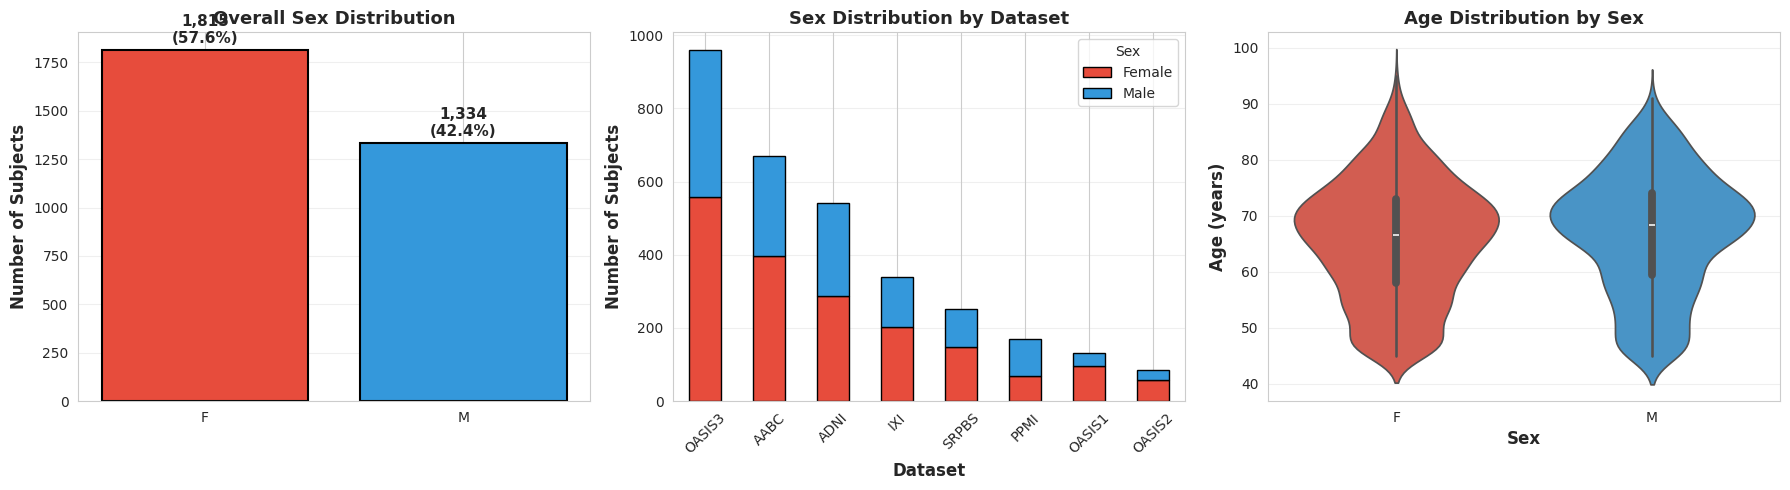


Sex Distribution Statistics:
------------------------------------------------------------
F: 1,815 (57.6%) - Age: 65.7 ± 10.7
M: 1,334 (42.4%) - Age: 67.0 ± 10.7


In [6]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. Overall sex distribution
ax = axes[0]
sex_counts = combined['sex'].value_counts()
colors_sex = {'M': '#3498db', 'F': '#e74c3c'}
bars = ax.bar(sex_counts.index, sex_counts.values, 
              color=[colors_sex.get(s, 'gray') for s in sex_counts.index],
              edgecolor='black', linewidth=1.5)
ax.set_ylabel('Number of Subjects', fontsize=12, fontweight='bold')
ax.set_title('Overall Sex Distribution', fontsize=13, fontweight='bold')
ax.grid(True, alpha=0.3, axis='y')
for bar, count in zip(bars, sex_counts.values):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 20,
            f'{int(count):,}\n({count/len(combined)*100:.1f}%)',
            ha='center', va='bottom', fontsize=11, fontweight='bold')

# 2. Sex distribution by dataset (stacked bar)
ax = axes[1]
sex_by_dataset = combined.groupby(['dataset', 'sex']).size().unstack(fill_value=0)
sex_by_dataset = sex_by_dataset.loc[dataset_order]  # Reorder by dataset size
sex_by_dataset.plot(kind='bar', stacked=True, ax=ax, color=[colors_sex.get('F'), colors_sex.get('M')],
                    edgecolor='black', linewidth=1)
ax.set_xlabel('Dataset', fontsize=12, fontweight='bold')
ax.set_ylabel('Number of Subjects', fontsize=12, fontweight='bold')
ax.set_title('Sex Distribution by Dataset', fontsize=13, fontweight='bold')
ax.legend(title='Sex', labels=['Female', 'Male'], fontsize=10)
ax.tick_params(axis='x', rotation=45)
ax.grid(True, alpha=0.3, axis='y')

# 3. Age by sex (violin plot)
ax = axes[2]
sns.violinplot(data=combined, x='sex', y='age', palette=colors_sex, ax=ax)
ax.set_xlabel('Sex', fontsize=12, fontweight='bold')
ax.set_ylabel('Age (years)', fontsize=12, fontweight='bold')
ax.set_title('Age Distribution by Sex', fontsize=13, fontweight='bold')
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Print sex statistics
print("\nSex Distribution Statistics:")
print("-" * 60)
for sex in ['F', 'M']:
    count = (combined['sex'] == sex).sum()
    pct = count / len(combined) * 100
    age_mean = combined[combined['sex'] == sex]['age'].mean()
    age_std = combined[combined['sex'] == sex]['age'].std()
    print(f"{sex}: {count:,} ({pct:.1f}%) - Age: {age_mean:.1f} ± {age_std:.1f}")

## 6. Geographic and Population Diversity

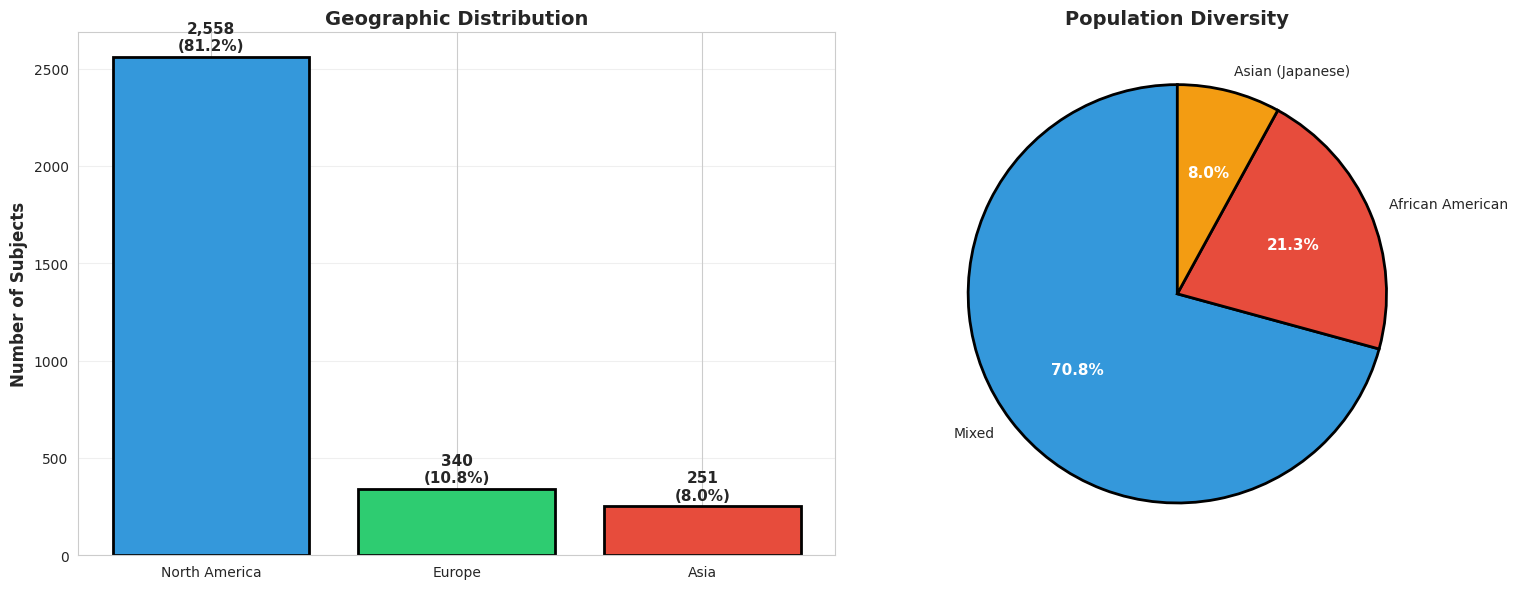


Geographic Distribution:
------------------------------------------------------------
North America       : 2,558 (81.2%)
Europe              : 340 (10.8%)
Asia                : 251 (8.0%)

Population Diversity:
------------------------------------------------------------
Mixed               : 2,228 (70.8%)
African American    : 670 (21.3%)
Asian (Japanese)    : 251 (8.0%)


In [7]:
# Define geographic regions
region_mapping = {
    'AABC': 'North America',
    'ADNI': 'North America',
    'PPMI': 'North America',
    'OASIS1': 'North America',
    'OASIS2': 'North America',
    'OASIS3': 'North America',
    'IXI': 'Europe',
    'SRPBS': 'Asia'
}

combined['region'] = combined['dataset'].map(region_mapping)

# Population diversity (simplified)
population_mapping = {
    'AABC': 'African American',
    'SRPBS': 'Asian (Japanese)',
    'ADNI': 'Mixed',
    'PPMI': 'Mixed',
    'OASIS1': 'Mixed',
    'OASIS2': 'Mixed',
    'OASIS3': 'Mixed',
    'IXI': 'Mixed'
}

combined['population'] = combined['dataset'].map(population_mapping)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 1. Geographic distribution
ax = axes[0]
region_counts = combined['region'].value_counts()
region_colors = {'North America': '#3498db', 'Europe': '#2ecc71', 'Asia': '#e74c3c'}
bars = ax.bar(region_counts.index, region_counts.values,
              color=[region_colors.get(r, 'gray') for r in region_counts.index],
              edgecolor='black', linewidth=2)
ax.set_ylabel('Number of Subjects', fontsize=12, fontweight='bold')
ax.set_title('Geographic Distribution', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3, axis='y')
for bar, count in zip(bars, region_counts.values):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 20,
            f'{int(count):,}\n({count/len(combined)*100:.1f}%)',
            ha='center', va='bottom', fontsize=11, fontweight='bold')

# 2. Population diversity
ax = axes[1]
pop_counts = combined['population'].value_counts()
pop_colors = {'African American': '#e74c3c', 'Asian (Japanese)': '#f39c12', 'Mixed': '#3498db'}
wedges, texts, autotexts = ax.pie(pop_counts.values, labels=pop_counts.index,
                                    colors=[pop_colors.get(p, 'gray') for p in pop_counts.index],
                                    autopct='%1.1f%%', startangle=90,
                                    wedgeprops={'edgecolor': 'black', 'linewidth': 2})
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(11)
ax.set_title('Population Diversity', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print("\nGeographic Distribution:")
print("-" * 60)
for region, count in region_counts.items():
    print(f"{region:20s}: {count:,} ({count/len(combined)*100:.1f}%)")

print("\nPopulation Diversity:")
print("-" * 60)
for pop, count in pop_counts.items():
    print(f"{pop:20s}: {count:,} ({count/len(combined)*100:.1f}%)")

## 7. Cognitive Assessment Coverage

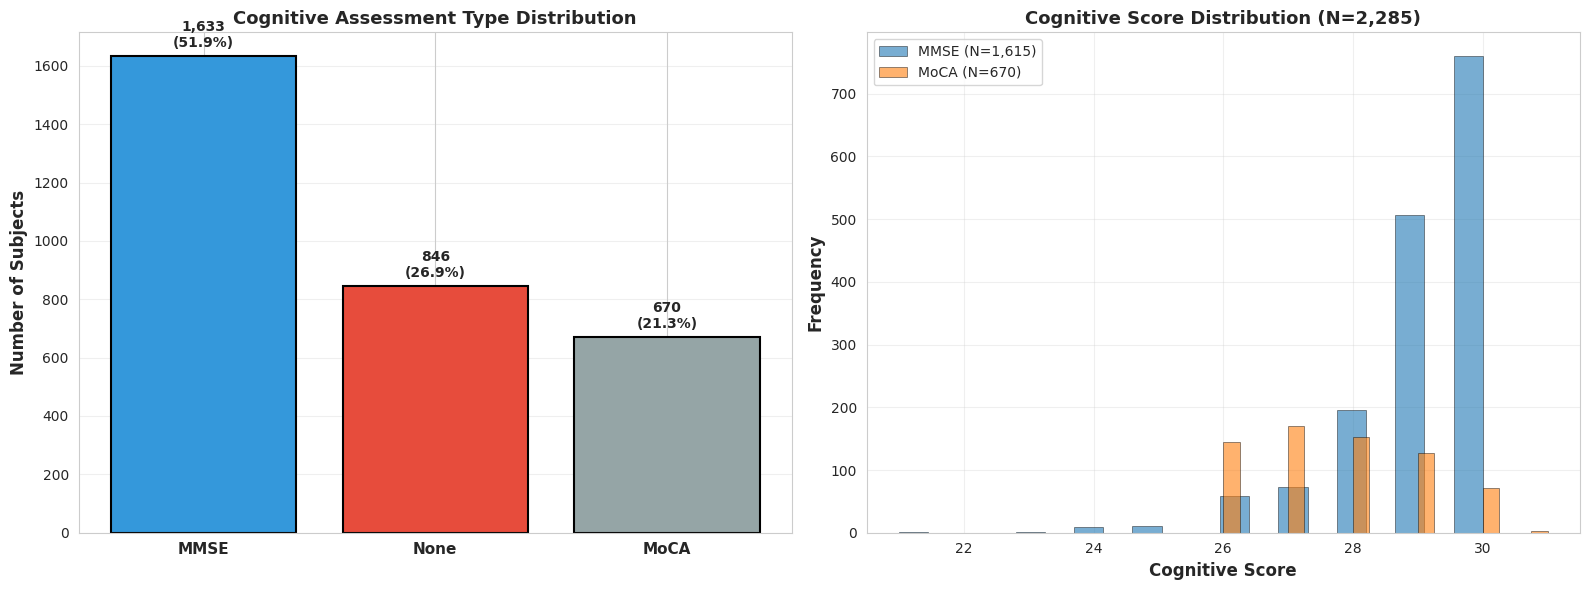


Cognitive Assessment Summary:
------------------------------------------------------------
Total with cognitive scores: 2,285 (72.6%)

By test type:
  MMSE: 1,633 subjects (score: 29.1 ± 1.2)
  MoCA: 670 subjects (score: 27.7 ± 1.3)


In [8]:
# Cognitive test availability
cog_test_counts = combined['cognitive_test'].value_counts()
cog_available = combined['cognitive_score'].notna().sum()

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 1. Cognitive test types
ax = axes[0]
bars = ax.bar(range(len(cog_test_counts)), cog_test_counts.values,
              color=['#3498db', '#e74c3c', '#95a5a6'][:len(cog_test_counts)],
              edgecolor='black', linewidth=1.5)
ax.set_xticks(range(len(cog_test_counts)))
ax.set_xticklabels(cog_test_counts.index, fontsize=11, fontweight='bold')
ax.set_ylabel('Number of Subjects', fontsize=12, fontweight='bold')
ax.set_title('Cognitive Assessment Type Distribution', fontsize=13, fontweight='bold')
ax.grid(True, alpha=0.3, axis='y')
for bar, count in zip(bars, cog_test_counts.values):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 20,
            f'{int(count):,}\n({count/len(combined)*100:.1f}%)',
            ha='center', va='bottom', fontsize=10, fontweight='bold')

# 2. Cognitive scores distribution (for those with scores)
ax = axes[1]
cog_data = combined[combined['cognitive_score'].notna()]
for test in ['MMSE', 'MoCA']:
    test_data = cog_data[cog_data['cognitive_test'] == test]['cognitive_score']
    if len(test_data) > 0:
        ax.hist(test_data, bins=20, alpha=0.6, label=f'{test} (N={len(test_data):,})',
                edgecolor='black', linewidth=0.5)
ax.set_xlabel('Cognitive Score', fontsize=12, fontweight='bold')
ax.set_ylabel('Frequency', fontsize=12, fontweight='bold')
ax.set_title(f'Cognitive Score Distribution (N={len(cog_data):,})', fontsize=13, fontweight='bold')
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nCognitive Assessment Summary:")
print("-" * 60)
print(f"Total with cognitive scores: {cog_available:,} ({cog_available/len(combined)*100:.1f}%)")
print(f"\nBy test type:")
for test, count in cog_test_counts.items():
    if test != 'None':
        mean_score = combined[combined['cognitive_test'] == test]['cognitive_score'].mean()
        std_score = combined[combined['cognitive_test'] == test]['cognitive_score'].std()
        print(f"  {test}: {count:,} subjects (score: {mean_score:.1f} ± {std_score:.1f})")

## 8. Age Decade Analysis

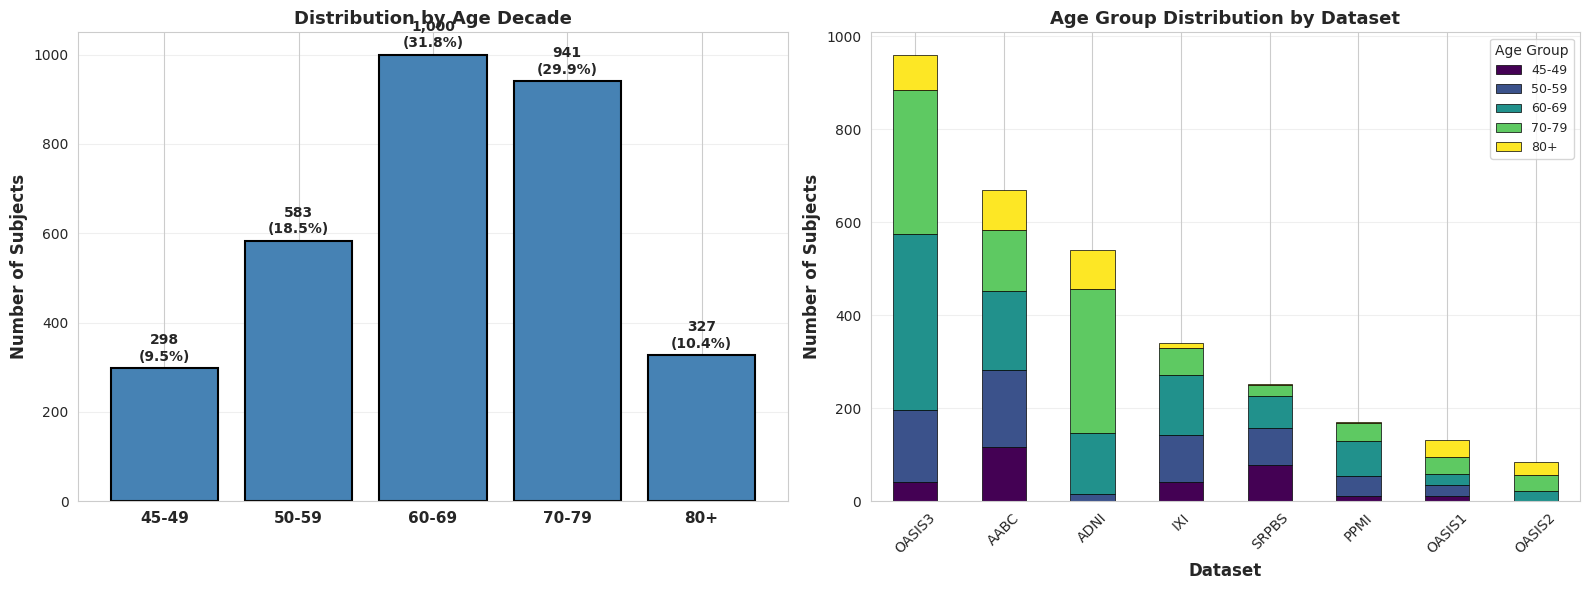


Age Group Distribution:
------------------------------------------------------------
45-49:  298 (  9.5%) ████
50-59:  583 ( 18.5%) █████████
60-69: 1,000 ( 31.8%) ███████████████
70-79:  941 ( 29.9%) ██████████████
80+:  327 ( 10.4%) █████


In [9]:
# Create age groups
age_bins = [45, 50, 60, 70, 80, 100]
age_labels = ['45-49', '50-59', '60-69', '70-79', '80+']
combined['age_group'] = pd.cut(combined['age'], bins=age_bins, labels=age_labels, right=False)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 1. Overall age group distribution
ax = axes[0]
age_group_counts = combined['age_group'].value_counts().sort_index()
bars = ax.bar(range(len(age_group_counts)), age_group_counts.values,
              color='steelblue', edgecolor='black', linewidth=1.5)
ax.set_xticks(range(len(age_group_counts)))
ax.set_xticklabels(age_group_counts.index, fontsize=11, fontweight='bold')
ax.set_ylabel('Number of Subjects', fontsize=12, fontweight='bold')
ax.set_title('Distribution by Age Decade', fontsize=13, fontweight='bold')
ax.grid(True, alpha=0.3, axis='y')
for bar, count in zip(bars, age_group_counts.values):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 10,
            f'{int(count):,}\n({count/len(combined)*100:.1f}%)',
            ha='center', va='bottom', fontsize=10, fontweight='bold')

# 2. Age groups by dataset (stacked bar)
ax = axes[1]
age_by_dataset = combined.groupby(['dataset', 'age_group']).size().unstack(fill_value=0)
age_by_dataset = age_by_dataset.loc[dataset_order]
age_by_dataset.plot(kind='bar', stacked=True, ax=ax, 
                    colormap='viridis', edgecolor='black', linewidth=0.5)
ax.set_xlabel('Dataset', fontsize=12, fontweight='bold')
ax.set_ylabel('Number of Subjects', fontsize=12, fontweight='bold')
ax.set_title('Age Group Distribution by Dataset', fontsize=13, fontweight='bold')
ax.legend(title='Age Group', fontsize=9, title_fontsize=10)
ax.tick_params(axis='x', rotation=45)
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\nAge Group Distribution:")
print("-" * 60)
for age_group, count in age_group_counts.items():
    pct = count / len(combined) * 100
    bar = '█' * int(pct / 2)
    print(f"{age_group}: {count:4,} ({pct:5.1f}%) {bar}")

## 9. Export Combined Dataset

In [10]:
# Save combined dataset
output_path = 'data/combined/all_datasets_age45plus.csv'
combined.to_csv(output_path, index=False)

print("="*80)
print("COMBINED DATASET EXPORTED")
print("="*80)
print(f"\n✓ File: {output_path}")
print(f"✓ Total subjects: {len(combined):,}")
print(f"✓ Datasets: {len(datasets)}")
print(f"\nColumns: {list(combined.columns)}")
print(f"\nFirst 10 rows:")
print(combined.head(10))

COMBINED DATASET EXPORTED

✓ File: data/combined/all_datasets_age45plus.csv
✓ Total subjects: 3,149
✓ Datasets: 8

Columns: ['subject_id', 'age', 'sex', 'dataset', 'site', 'cognitive_score', 'cognitive_test', 'region', 'population', 'age_group']

First 10 rows:
   subject_id   age sex dataset   site  cognitive_score cognitive_test  \
0  HCA6002236  48.0   F    AABC  UMinn             27.0           MoCA   
1  HCA6003238  68.0   M    AABC  WashU             26.0           MoCA   
2  HCA6010538  70.0   M    AABC  WashU             26.0           MoCA   
3  HCA6016146  63.0   F    AABC  UMinn             28.0           MoCA   
4  HCA6031344  80.0   F    AABC  UMinn             28.0           MoCA   
5  HCA6037457  73.0   F    AABC  UMinn             30.0           MoCA   
6  HCA6042046  58.0   F    AABC   UCLA             29.0           MoCA   
7  HCA6047359  53.0   M    AABC  WashU             29.0           MoCA   
8  HCA6051047  60.0   F    AABC  WashU             27.0           MoCA  

## 10. Summary Statistics

In [11]:
print("="*80)
print("FINAL COMBINED DATASET SUMMARY")
print("="*80)
print()
print(f"Total Sample: {len(combined):,} healthy controls")
print(f"Age Criterion: ≥45 years")
print()
print("AGE STATISTICS:")
print("-" * 60)
print(f"  Range: {combined['age'].min():.0f}-{combined['age'].max():.0f} years")
print(f"  Mean: {combined['age'].mean():.1f} ± {combined['age'].std():.1f}")
print(f"  Median: {combined['age'].median():.0f}")
print(f"  Q1-Q3: {combined['age'].quantile(0.25):.0f}-{combined['age'].quantile(0.75):.0f}")
print()
print("SEX DISTRIBUTION:")
print("-" * 60)
for sex in ['F', 'M']:
    count = (combined['sex'] == sex).sum()
    print(f"  {sex}: {count:,} ({count/len(combined)*100:.1f}%)")
print()
print("DATASET CONTRIBUTIONS:")
print("-" * 60)
for dataset in dataset_order:
    count = (combined['dataset'] == dataset).sum()
    print(f"  {dataset:<10s}: {count:4,} ({count/len(combined)*100:5.1f}%)")
print()
print("GEOGRAPHIC DISTRIBUTION:")
print("-" * 60)
for region, count in combined['region'].value_counts().items():
    print(f"  {region:20s}: {count:,} ({count/len(combined)*100:.1f}%)")
print()
print("POPULATION DIVERSITY:")
print("-" * 60)
for pop, count in combined['population'].value_counts().items():
    print(f"  {pop:20s}: {count:,} ({count/len(combined)*100:.1f}%)")
print()
print("COGNITIVE ASSESSMENT:")
print("-" * 60)
cog_available = combined['cognitive_score'].notna().sum()
print(f"  Subjects with scores: {cog_available:,} ({cog_available/len(combined)*100:.1f}%)")
for test in ['MMSE', 'MoCA']:
    test_data = combined[combined['cognitive_test'] == test]
    if len(test_data) > 0:
        mean_score = test_data['cognitive_score'].mean()
        std_score = test_data['cognitive_score'].std()
        print(f"  {test}: {len(test_data):,} subjects ({mean_score:.1f} ± {std_score:.1f})")
print()
print("="*80)
print("READY FOR NORMATIVE MODELING")
print("="*80)
print()
print("Next Steps:")
print("  1. Run SynthSeg on all T1w images")
print("  2. Extract volumetric features")
print("  3. Apply ComBat harmonization (multi-site)")
print("  4. Fit normative models (GAM with age + sex)")
print("  5. Generate percentile charts for clinical use")
print()

FINAL COMBINED DATASET SUMMARY

Total Sample: 3,149 healthy controls
Age Criterion: ≥45 years

AGE STATISTICS:
------------------------------------------------------------
  Range: 45-95 years
  Mean: 66.2 ± 10.7
  Median: 67
  Q1-Q3: 58-74

SEX DISTRIBUTION:
------------------------------------------------------------
  F: 1,815 (57.6%)
  M: 1,334 (42.4%)

DATASET CONTRIBUTIONS:
------------------------------------------------------------
  OASIS3    :  960 ( 30.5%)
  AABC      :  670 ( 21.3%)
  ADNI      :  541 ( 17.2%)
  IXI       :  340 ( 10.8%)
  SRPBS     :  251 (  8.0%)
  PPMI      :  170 (  5.4%)
  OASIS1    :  132 (  4.2%)
  OASIS2    :   85 (  2.7%)

GEOGRAPHIC DISTRIBUTION:
------------------------------------------------------------
  North America       : 2,558 (81.2%)
  Europe              : 340 (10.8%)
  Asia                : 251 (8.0%)

POPULATION DIVERSITY:
------------------------------------------------------------
  Mixed               : 2,228 (70.8%)
  African Amer